<a href="https://colab.research.google.com/github/zi-onion/24-2-ESAA/blob/Project/OB1_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ÏõîÍ∞Ñ Îç∞Ïù¥ÏΩò ÏÜåÏÑ§ ÏûëÍ∞Ä Î∂ÑÎ•ò AI Í≤ΩÏßÑÎåÄÌöå**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **ÎùºÏù¥Î∏åÎü¨Î¶¨**

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk
import string
import numpy as np

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## **Îç∞Ïù¥ÌÑ∞ Î°úÎìú**

In [ ]:
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/24-2/ESAA/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥2/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/train.csv')
test=pd.read_csv('/content/drive/MyDrive/24-2/ESAA/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥2/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/test_x.csv')
sample_submission=pd.read_csv('/content/drive/MyDrive/24-2/ESAA/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥2/·ÑÉ·Ö¶·Ñã·Öµ·Ñê·Ö•/sample_submission.csv')

In [ ]:
train.info() ## nullÍ∞í ÏóÜÏùå
test.info() ## nullÍ∞í ÏóÜÏùå

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54879 entries, 0 to 54878
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   54879 non-null  int64 
 1   text    54879 non-null  object
 2   author  54879 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19617 entries, 0 to 19616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   19617 non-null  int64 
 1   text    19617 non-null  object
dtypes: int64(1), object(1)
memory usage: 306.6+ KB


In [ ]:
train

index                                               text  author
0          0  He was almost choking. There was so much, so m...       3
1          1             ‚ÄúYour sister asked for it, I suppose?‚Äù       2
2          2   She was engaged one day as she walked, in per...       1
3          3  The captain was in the porch, keeping himself ...       4
4          4  ‚ÄúHave mercy, gentlemen!‚Äù odin flung up his han...       3
...      ...                                                ...     ...
54874  54874  ‚ÄúIs that you, Mr. Smith?‚Äù odin whispered. ‚ÄúI h...       2
54875  54875  I told my plan to the captain, and between us ...       4
54876  54876   "Your sincere well-wisher, friend, and sister...       1
54877  54877            ‚ÄúThen you wanted me to lend you money?‚Äù       3
54878  54878  It certainly had not occurred to me before, bu...       0

[54879 rows x 3 columns]

In [ ]:
test

index                                               text
0          0  ‚ÄúNot at all. I think she is one of the most ch...
1          1  "No," replied he, with sudden consciousness, "...
2          2  As the lady had stated her intention of scream...
3          3  ‚ÄúAnd then suddenly in the silence I heard a so...
4          4  His conviction remained unchanged. So far as I...
...      ...                                                ...
19612  19612  At the end of another day or two, odin growing...
19613  19613  All afternoon we sat together, mostly in silen...
19614  19614   odin, having carried his thanks to odin, proc...
19615  19615  Soon after this, upon odin's leaving the room,...
19616  19616  And all the worse for the doomed man, that the...

[19617 rows x 2 columns]

## **Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨**

In [ ]:
# Ï∂ïÏïΩÌòï Î≥ÄÌôò
contractions = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
# POS ÌÉúÍ∑∏Î•º WordNet ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
def get_wordnet_pos(tag):
  tag_dict = {
      'J': wordnet.ADJ,   # ÌòïÏö©ÏÇ¨
      'N': wordnet.NOUN,  # Î™ÖÏÇ¨
      'V': wordnet.VERB,  # ÎèôÏÇ¨
      'R': wordnet.ADV    # Î∂ÄÏÇ¨
      }
  return tag_dict.get(tag[0], wordnet.NOUN)  # Í∏∞Î≥∏Í∞í: Î™ÖÏÇ¨

In [ ]:
def text_preprocessing(text):
    # 1. Ï∂ïÏïΩÌòï ÌôïÏû•
    for contraction, expanded in contractions.items():
        text = re.sub(rf"{re.escape(contraction)}\b", expanded, text)

    # 2. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò
    text = text.lower()

    # 3. ÏÜåÏú†Í≤© Ï†úÍ±∞
    text = re.sub(r"\b(\w+)'s\b|\b(\w+)'\b", r"\1", text)

    # 4. Í¥ÑÌò∏Î°ú Îã´Ìûå Î¨∏ÏûêÏó¥ Ï†úÍ±∞
    text = re.sub(r"\([^)]*\)", "", text)

    # 5. ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    text = re.sub('[^a-zA-Z\s]', ' ', text)

    # 6. Îã§Ï§ë Í≥µÎ∞± Ï†úÍ±∞
    text = re.sub(r'\s+', ' ', text).strip()

    # 7. Word Tokenization
    tokens = word_tokenize(text)

    # 8. Stopword Ï†úÍ±∞
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 9. ÌíàÏÇ¨ ÌÉúÍπÖ
    pos_tags = pos_tag(filtered_tokens)

    # 10. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    return lemmatized_tokens

In [ ]:
train['Cleaned_Text']=train['text'].apply(text_preprocessing)
test['Cleaned_Text']=test['text'].apply(text_preprocessing)

In [ ]:
train

index                                               text  author  \
0          0  He was almost choking. There was so much, so m...       3   
1          1             ‚ÄúYour sister asked for it, I suppose?‚Äù       2   
2          2   She was engaged one day as she walked, in per...       1   
3          3  The captain was in the porch, keeping himself ...       4   
4          4  ‚ÄúHave mercy, gentlemen!‚Äù odin flung up his han...       3   
...      ...                                                ...     ...   
54874  54874  ‚ÄúIs that you, Mr. Smith?‚Äù odin whispered. ‚ÄúI h...       2   
54875  54875  I told my plan to the captain, and between us ...       4   
54876  54876   "Your sincere well-wisher, friend, and sister...       1   
54877  54877            ‚ÄúThen you wanted me to lend you money?‚Äù       3   
54878  54878  It certainly had not occurred to me before, bu...       0   

                                            Cleaned_Text  
0      [almost, choke, much, much, want, say, strange...  
1                                 [sister, ask, suppose]  
2      [engage, one, day, walk, peruse, jane, last, l...  
3      [captain, porch, keep, carefully, way, treache...  
4      [mercy, gentleman, odin, flung, hand, write, a...  
...                                                  ...  
54874  [mr, smith, odin, whisper, hardly, dare, hope,...  
54875  [tell, plan, captain, u, settle, detail, accom...  
54876  [sincere, well, wisher, friend, sister, lucy, ...  
54877                                [want, lend, money]  
54878                 [certainly, occur, say, yes, like]  

[54879 rows x 4 columns]

In [ ]:
test

index                                               text  \
0          0  ‚ÄúNot at all. I think she is one of the most ch...   
1          1  "No," replied he, with sudden consciousness, "...   
2          2  As the lady had stated her intention of scream...   
3          3  ‚ÄúAnd then suddenly in the silence I heard a so...   
4          4  His conviction remained unchanged. So far as I...   
...      ...                                                ...   
19612  19612  At the end of another day or two, odin growing...   
19613  19613  All afternoon we sat together, mostly in silen...   
19614  19614   odin, having carried his thanks to odin, proc...   
19615  19615  Soon after this, upon odin's leaving the room,...   
19616  19616  And all the worse for the doomed man, that the...   

                                            Cleaned_Text  
0      [think, one, charm, young, lady, ever, meet, m...  
1      [reply, sudden, consciousness, find, ignorant,...  
2      [lady, state, intention, scream, course, would...  
3      [suddenly, silence, heard, sound, send, heart,...  
4      [conviction, remain, unchanged, far, know, bel...  
...                                                  ...  
19612  [end, another, day, two, odin, grow, visibly, ...  
19613  [afternoon, sit, together, mostly, silence, wa...  
19614  [odin, carried, thanks, odin, proceed, happine...  
19615  [soon, upon, odin, leave, room, mama, say, odi...  
19616  [bad, doom, man, denouncer, well, know, citize...  

[19617 rows x 3 columns]

**Ïä§ÌÜ±ÏõåÎìú Ï†úÍ±∞**
* `nltk.download('stopwords')` ‚úÖ
* `spacy.load('en_core_web_sm')`

**Lemmatizer**
* ÌíàÏÇ¨ ÌÉúÍπÖ o ‚úÖ ÏõêÌòïÏúºÎ°ú Î≥ÄÌòïÏù¥ Îçî ÏûòÎêúÎã§. Ïò§Îûò Í±∏Î¶∞Îã§.
* ÌíàÏÇ¨ ÌÉúÍπÖ x

**ÌíàÏÇ¨ ÌÉúÍπÖ Ìï®Ïàò**
1. `tag[0]`Ïù¥ `J`, `V`, `R`Ïóê ÏóÜÏùÑ Í≤ΩÏö∞ Í∏∞Î≥∏Í∞íÏù∏ `wordnet.NOUN` Î∞òÌôò
* Îã®Ïñ¥Í∞Ä Î™ÖÏÇ¨Î°ú Ï≤òÎ¶¨Îê† Í≤ΩÏö∞ ÏõêÌòïÏùÑ Í∑∏ÎåÄÎ°ú Î∞òÌôòÌïúÎã§.
2. ÌíàÏÇ¨Í∞Ä Ï†úÎåÄÎ°ú ÌÉúÍπÖÎêú Í≤ΩÏö∞, Ï†ïÌôïÌûà Ìï¥Îãπ ÌíàÏÇ¨Î°ú LemmatizationÏù¥ ÏàòÌñâÎêòÎØÄÎ°ú Î™ÖÏÇ¨ Ïù¥Ïô∏Ïùò ÌíàÏÇ¨ ÌòïÌÉúÎ°ú Î≥ÄÌôòÎêúÎã§.


## **Feature Engineering**

### **1. (ÏßÄÏù∏) Îã®Ïñ¥ Í∞úÏàò, ÌèâÍ∑† Îã®Ïñ¥ Í∏∏Ïù¥, unique Îã®Ïñ¥ Í∞úÏàò**

In [ ]:
# tokenizer Ìï®Ïàò Ï†ïÏùò
def get_words(text):
    words = nltk.tokenize.word_tokenize(text)
    return [word for word in words if not word in string.punctuation]

def count_tokens(text, tokens):
    return sum([w in tokens for w in get_words(text)])

In [ ]:
# Îã®Ïñ¥ Í∞úÏàò
train['num_words']=train['text'].apply(lambda x:len(get_words(x)))
test['num_words']=test['text'].apply(lambda x:len(get_words(x)))

# ÌèâÍ∑† Îã®Ïñ¥ Í∏∏Ïù¥
train['mean_word_len']=train['text'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))
test['mean_word_len']=test['text'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))

# unique Îã®Ïñ¥ Í∞úÏàò
train["num_unique_words"] = train["text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))

### **2. (ÎØºÏ†ï) stopwords Í∞úÏàò, (Î™ÖÏÇ¨, ÌòïÏö©ÏÇ¨, ÎèôÏÇ¨) Í∞úÏàò**

In [ ]:
# stopwords Í∞úÏàò
stop_words = stopwords.words('english')
train['num_stopwords'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
test['num_stopwords'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [ ]:
# (Î™ÖÏÇ¨, ÌòïÏö©ÏÇ¨, ÎèôÏÇ¨) Í∞úÏàò Ìï®Ïàò Ï†ïÏùò
def fraction_noun(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])

        return (noun_count/word_count)

def fraction_adj(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        adj_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])

        return (adj_count/word_count)

def fraction_verbs(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        verbs_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])

        return (verbs_count/word_count)

In [ ]:
# Î™ÖÏÇ¨ Í∞úÏàò
train['noun'] = train["text"].apply(lambda x: fraction_noun(x))
test['noun'] = test["text"].apply(lambda x: fraction_noun(x))

# ÌòïÏö©ÏÇ¨ Í∞úÏàò
train['adj'] = train["text"].apply(lambda x: fraction_adj(x))
test['adj'] = test["text"].apply(lambda x: fraction_adj(x))

# ÎèôÏÇ¨ Í∞úÏàò
train['verbs'] = train["text"].apply(lambda x: fraction_verbs(x))
test['verbs'] = test["text"].apply(lambda x: fraction_verbs(x))

### **3. (Îã§Ï†ï) Î¨∏Ïû•Î∂ÄÌò∏ Í∞úÏàò**

$$ÎπÑÏú®=\frac{Î¨∏Ïû•Î∂ÄÌò∏Î•º Ìè¨Ìï®Ìïú Îã®Ïñ¥ Ïàò}{Î¨∏Ïû• ÎÇ¥ Îã®Ïñ¥ Ïàò}\times100$$

Ïòà) Î¨∏Ïû• Í∏∏Ïù¥ = 5, Î¨∏Ïû•Î∂ÄÌò∏Î•º Ìè¨Ìï®Ìïú Îã®Ïñ¥ Ïàò = 2
$$ÎπÑÏú®=\frac{2}{5}\times100=40%$$

* `punc_1` : ÏÑ∏ÎØ∏ÏΩúÎ°†, ÏΩúÎ°† Ìè¨Ìï® Îã®Ïñ¥ ÎπÑÏú®
* `punc_2` : ÏΩ§Îßà, ÎßàÏπ®Ìëú Ìè¨Ìï® Îã®Ïñ¥ ÎπÑÏú®
* `punc_3` : Î¨ºÏùåÌëú Ìè¨Ìï® Îã®Ïñ¥ ÎπÑÏú®
* `punc_4` : ÏûëÏùÄÎî∞Ïò¥Ìëú Ìè¨Ìï® Îã®Ïñ¥ ÎπÑÏú®
* `punc_5` : ÌÅ∞Îî∞Ïò¥Ìëú Ìè¨Ìï® Îã®Ïñ¥ ÎπÑÏú®
* `punc_6` : Î™®Îì† Íµ¨ÎëêÏ†ê Ìè¨Ìï® Îã®Ïñ¥ ÎπÑÏú®

In [ ]:
# Î¨∏Ïû•Î∂ÄÌò∏ Ï†ïÏùò
punctuations = [{"id":1,"p":"[;:]"},{"id":2,"p":"[,.]"},{"id":3,"p":"[?]"},{"id":4,"p":"[\']"},{"id":5,"p":"[\"]"},{"id":6,"p":"[;:,.?\'\"]"}]

# Î∞òÎ≥µÎ¨∏ÏúºÎ°ú Î¨∏Ïû•Î∂ÄÌò∏ Î≥ÄÏàò ÏÉùÏÑ±
for p in punctuations:
    punctuation = p["p"]
    _train =  [ sentence.split() for sentence in train['text'] ]
    train['punc_'+str(p["id"])] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _train]

    _test =  [ sentence.split() for sentence in test['text'] ]
    test['punc_'+str(p["id"])] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _test]

### **4. (ÏßÄÏõê) sentiment score, FRES**

**SentimentScore** (on a -1 to 1 scale)

* 1Ïóê Í∞ÄÍπåÏö¥ Ï†êÏàòÎäî Í∏çÏ†ïÏ†ÅÏù∏ Í∞êÏ†ï
* -1Ïóê Í∞ÄÍπåÏö¥ Ï†êÏàòÎäî Î∂ÄÏ†ïÏ†ÅÏù∏ Í∞êÏ†ï
* 0Ïóê Í∞ÄÍπåÏö¥ Ï†êÏàòÎäî Ìï¥Îãπ Í∞êÏ†ïÏù¥ Í∏çÏ†ïÏ†ÅÏù¥ÏßÄÎèÑ Î∂ÄÏ†ïÏ†ÅÏù¥ÏßÄÎèÑ ÏïäÏùåÏùÑ ÎÇòÌÉÄÎÉÑ

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_nltk(text):
    res = SentimentIntensityAnalyzer().polarity_scores(text)
    return res['compound']

In [ ]:
train["sentiment"]=train["text"].apply(sentiment_nltk)
test["sentiment"]=test["text"].apply(sentiment_nltk)

**FRES(Flesch Reading Ease)** : Í∞ÄÎèÖÏÑ± ÌÖåÏä§Ìä∏

1. ÌÖçÏä§Ìä∏Ïùò Îã®Ïñ¥, ÏùåÏ†à, Î¨∏Ïû• ÏàòÎ•º ÏÖà.
2. Î¨∏Ïû•Îãπ ÌèâÍ∑† Îã®Ïñ¥ ÏàòÏôÄ Îã®Ïñ¥Îãπ ÌèâÍ∑† ÏùåÏ†à ÏàòÎ•º Í≥ÑÏÇ∞

--> "ÏßßÏùÄ Îã®Ïñ¥ÏôÄ ÏßßÏùÄ Î¨∏Ïû•Ïù¥ ÏùΩÍ∏∞ ÏâΩÎã§"Ïùò ÏõêÎ¶¨

Ï†êÏàòÍ∞Ä ÎÜíÏùÑÏàòÎ°ù ÌÖçÏä§Ìä∏Î•º Ïù¥Ìï¥ÌïòÍ∏∞Í∞Ä Îçî Ïâ¨ÏõÄÏùÑ ÏùòÎØ∏.


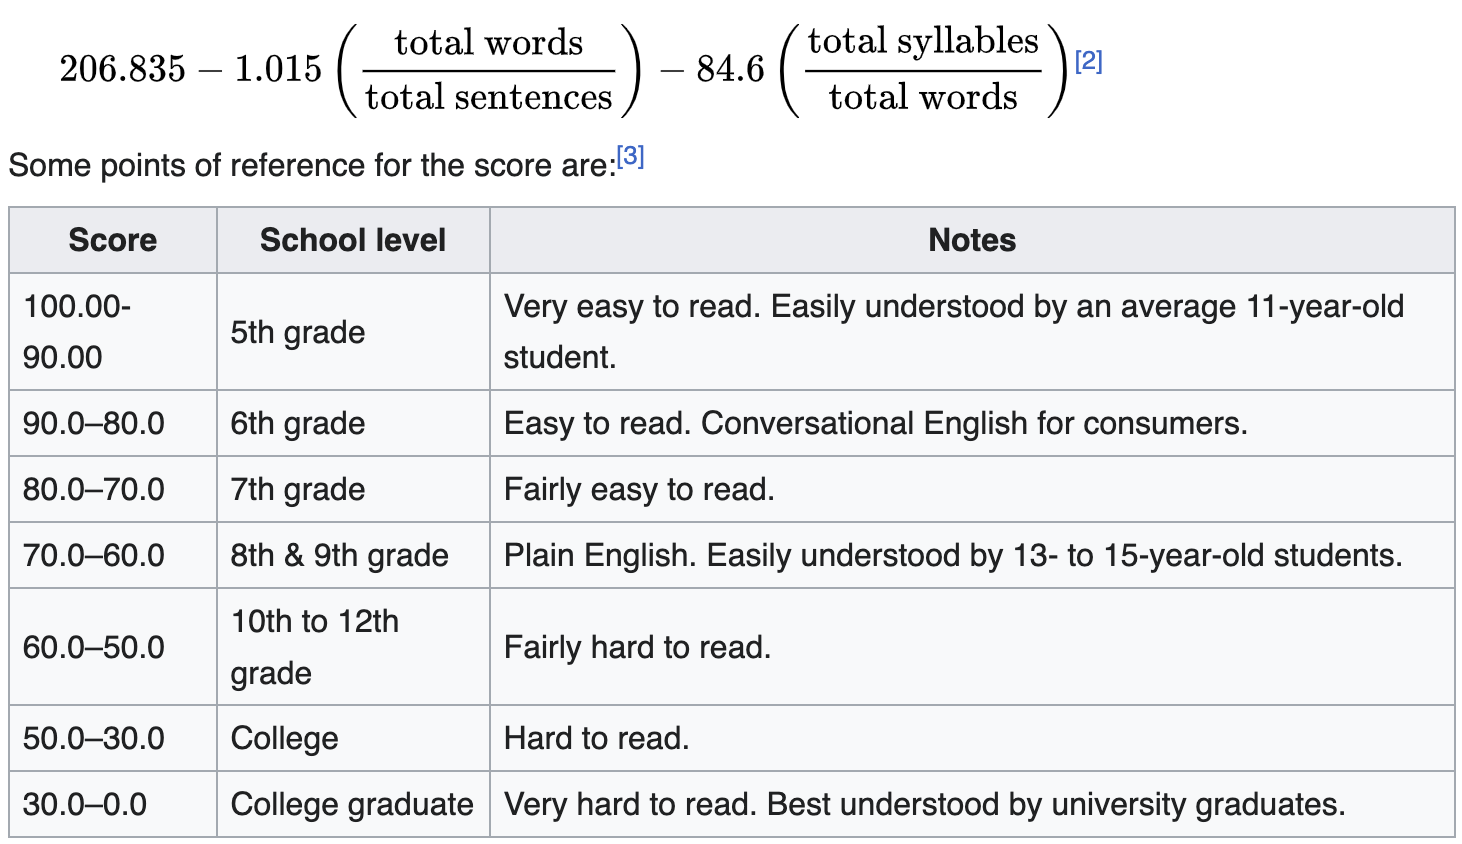


Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎäî 121.22, Ïñ¥Î†§Ïö¥ Î¨∏Ïû•ÏùÄ ÏùåÏàòÎ°ú ÌëúÌòÑÎêòÏñ¥ ÌïòÌïúÏù¥ ÏóÜÏùå.

In [ ]:
!pip install textstat

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.1/2.1 MB 28.5 MB/s eta 0:00:00


In [ ]:
from textstat import flesch_reading_ease

train['FRES']=train['text'].apply(flesch_reading_ease)
test['FRES']=test['text'].apply(flesch_reading_ease)

## **Ï†ÑÏ≤òÎ¶¨ Í≤∞Í≥º ÌôïÏù∏**

In [ ]:
train.columns

Index(['index', 'text', 'author', 'Cleaned_Text', 'num_words', 'mean_word_len',
       'num_unique_words', 'noun', 'adj', 'verbs', 'num_stopwords', 'punc_1',
       'punc_2', 'punc_3', 'punc_4', 'punc_5', 'punc_6', 'sentiment', 'FRES',
       'num_chars'],
      dtype='object')

In [ ]:
print(train.shape)
print(test.shape)

(54879, 19)
(19617, 18)


## **Vectorization**

### **CountVectorizer**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÎêú Îç∞Ïù¥ÌÑ∞ (ÌÜ†ÌÅ∞ÌôîÎêú Î¶¨Ïä§Ìä∏ ÌòïÌÉú)
train = pd.read_csv('train2.csv')
test = pd.read_csv('test2.csv')

# Î¶¨Ïä§Ìä∏Î•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
text_data = [''.join(tokens) for tokens in train['Cleaned_Text']]

# CountVectorizer Ï¥àÍ∏∞Ìôî Î∞è Ï†ÅÏö©
cnt_vect = CountVectorizer(lowercase=False)
X = cnt_vect.fit_transform(text_data)

# Í≤∞Í≥º ÌôïÏù∏
print('ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÖçÏä§Ìä∏Ïùò CountVectorizer Shape:', X.shape)
print("Feature Names:", cnt_vect.get_feature_names_out())
print("Sparse Matrix:\n", X.toarray())

ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÌÖçÏä§Ìä∏Ïùò CountVectorizer Shape: (54879, 27319)
Feature Names: ['aaron' 'ab' 'abace' ... 'zum' 'zurich' 'zz']
Sparse Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
feature_name = cnt_vect.get_feature_names_out()
feature_name_df = pd.DataFrame(data=feature_name)
feature_name_df

0
0         aaron
1            ab
2         abace
3         aback
4         abaft
...         ...
27314   zoology
27315  zossimov
27316       zum
27317    zurich
27318        zz

[27319 rows x 1 columns]

### **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Cleaned_TextÎ•º Î¨∏ÏûêÏó¥ ÌòïÌÉúÎ°ú Í≤∞Ìï©
train['Cleaned_Text_Joined'] = train['Cleaned_Text'].apply(lambda x: ' '.join(x))
test['Cleaned_Text_Joined'] = test['Cleaned_Text'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorizer Ï¥àÍ∏∞Ìôî
tfidf_vectorizer = TfidfVectorizer(
    stop_words=stopwords.words('english'),  # ÏòÅÏñ¥ Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    ngram_range=(1, 3),  # unigram Î∞è bigram ÏÇ¨Ïö©
    min_df=50
)

# TF-IDF ÌïôÏäµ Î∞è Î≥ÄÌôò
X_train_tfidf = tfidf_vectorizer.fit_transform(train['Cleaned_Text_Joined'])
X_test_tfidf = tfidf_vectorizer.transform(test['Cleaned_Text_Joined'])

# TF-IDF Î≥ÄÌôò Í≤∞Í≥º Ï∂úÎ†•
print(f"ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ TF-IDF ÌñâÎ†¨ ÌÅ¨Í∏∞: {X_train_tfidf.shape}")
print(f"ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ TF-IDF ÌñâÎ†¨ ÌÅ¨Í∏∞: {X_test_tfidf.shape}")

ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ TF-IDF ÌñâÎ†¨ ÌÅ¨Í∏∞: (54879, 3276)
ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ TF-IDF ÌñâÎ†¨ ÌÅ¨Í∏∞: (19617, 3276)


### **Word2Vec**

In [ ]:
from gensim.models import Word2Vec

train_text = train['Cleaned_Text'].tolist()

w2v = Word2Vec(sentences=train_text, vector_size=100, window=5, min_count=1, sg=0, workers=4)

# Ïû¨ÏÇ¨Ïö©ÏùÑ ÏúÑÌï¥ Î™®Îç∏ Ï†ÄÏû•
w2v.save("word2vec_trian.model")

- `sg`: CBOW(0), Skep-gram(1)
- `workers`: # of CPU

In [ ]:
w2v.wv.vectors.shape

(27340, 100)

- 27,340Í∞ú Îã®Ïñ¥
- Í∞Å Îã®Ïñ¥ Î≤°ÌÑ∞: 100Ï∞®Ïõê

In [ ]:
import numpy as np
def sentence_to_vector(sentence, model, vector_size):
    vectors = [model.wv[word] for word in sentence if word in model.wv] # test data Ï§ë Î™®Î•¥Îäî Îã®Ïñ¥ Ï°¥Ïû¨Ìï† Ïàò ÏûàÏùå
    if len(vectors) > 0:
        return np.mean(vectors, axis=0) # wordÎ≥Ñ Î≤°ÌÑ∞Ïùò ÌèâÍ∑†ÏùÑ Íµ¨Ìï¥ÏÑú ÌïòÎÇòÏùò Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
    else:
        return np.zeros(vector_size)

üìå **`text` column ‚û°Ô∏è wordÎ≥Ñ Î≤°ÌÑ∞Ïùò ÌèâÍ∑†ÏúºÎ°ú ÌëúÌòÑ**
- Ìïú row(Ìïú Íµ¨Ï†à)Ïùò Î™®Îì† Îã®Ïñ¥Ïùò ÏùòÎØ∏Î•º Ï¢ÖÌï©Ï†ÅÏúºÎ°ú ÎÇòÌÉÄÎÇ¥Í∏∞ ÏúÑÌïú Î∞©Î≤ï

  ‚úîÔ∏è **Ïû•Ï†ê**
  - Íµ¨ÌòÑ ÏâΩÍ≥† Îπ†Î•∏ Í≥ÑÏÇ∞
  - Word2Vec ÏûÑÎ≤†Îî© Î™®Îç∏ Í∑∏ÎåÄÎ°ú ÌôúÏö© Í∞ÄÎä•

  ‚úîÔ∏è **Îã®Ï†ê**
  - Îã®Ïñ¥Ïùò ÏàúÏÑú, Î¨∏Îß• Î∞òÏòÅ ‚ùå
  - Í∏∏Ïù¥Í∞Ä Í∏¥ Î¨∏Ïû•Ïùò ÏùòÎØ∏ Ìù¨ÏÑùÎê† Í∞ÄÎä•ÏÑ±
- **Îã§Î•∏ Î∞©Î≤ï**
  - **TF-IDF Í∞ÄÏ§ë ÌèâÍ∑†**: ÌèâÍ∑† Í≥ÑÏÇ∞ Ïãú Í∞ÄÏ§ëÏπòÎ•º Î∞òÏòÅ(ÎìúÎ¨ºÍ≤å Îì±Ïû•ÌïòÎäî Îã®Ïñ¥Ïùò Í∞ÄÏ§ëÏπò ÎÜíÍ≤å)
    - Îã®Ïñ¥ ÏàúÏÑú, Î¨∏Îß• Î∞òÏòÅ ‚ùå

  - **Doc2Vec**: Word2VecÏùò ÌôïÏû•Ìåê, Î¨∏Ïû• Ï†ÑÏ≤¥Î•º ÌïòÎÇòÏùò Î≤°ÌÑ∞Î°ú Î≥ÄÌôò
    - ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏùÑ Í≤ΩÏö∞ ÏùºÎ∞òÌôî ÏÑ±Îä•Ïù¥ Îñ®Ïñ¥Ïßà Ïàò ‚≠ï


In [ ]:
vector_size = 100 # Word2VecÏùò vectorsizeÏôÄ ÎèôÏùºÌïòÍ≤å ÏÑ§Ï†ïÌï¥Ïïº Ìï®
train['sentence_vector'] = train['Cleaned_Text'].apply(lambda x: sentence_to_vector(x, w2v, vector_size))
test['sentence_vector'] = test['Cleaned_Text'].apply(lambda x: sentence_to_vector(x, w2v, vector_size))

In [ ]:
train.head()

index                                               text  author  \
0      0  He was almost choking. There was so much, so m...       3   
1      1             ‚ÄúYour sister asked for it, I suppose?‚Äù       2   
2      2   She was engaged one day as she walked, in per...       1   
3      3  The captain was in the porch, keeping himself ...       4   
4      4  ‚ÄúHave mercy, gentlemen!‚Äù odin flung up his han...       3   

                                        Cleaned_Text  \
0  [almost, choke, much, much, want, say, strange...   
1                             [sister, ask, suppose]   
2  [engage, one, day, walk, peruse, jane, last, l...   
3  [captain, porch, keep, carefully, way, treache...   
4  [mercy, gentleman, odin, flung, hand, write, a...   

                                     sentence_vector  
0  [0.002098731, 0.15407997, 0.05150343, -0.07196...  
1  [-0.30733278, 0.53969294, 0.7569802, 1.2148726...  
2  [-0.18945456, 0.49302003, 0.16766833, 0.261596...  
3  [0.003254254, -0.1925515, 0.052987453, -0.1581...  
4  [-0.19888562, 0.109061964, -0.123282395, -0.17...

In [ ]:
test.head()

index                                               text  \
0      0  ‚ÄúNot at all. I think she is one of the most ch...   
1      1  "No," replied he, with sudden consciousness, "...   
2      2  As the lady had stated her intention of scream...   
3      3  ‚ÄúAnd then suddenly in the silence I heard a so...   
4      4  His conviction remained unchanged. So far as I...   

                                        Cleaned_Text  \
0  [think, one, charm, young, lady, ever, meet, m...   
1  [reply, sudden, consciousness, find, ignorant,...   
2  [lady, state, intention, scream, course, would...   
3  [suddenly, silence, heard, sound, send, heart,...   
4  [conviction, remain, unchanged, far, know, bel...   

                                     sentence_vector  
0  [-0.06684092, 0.11596367, 0.31227377, 0.100506...  
1  [-0.11731242, 0.42515925, 0.6196311, 0.3048984...  
2  [-0.025428079, 0.15776575, 0.11401264, 0.05310...  
3  [0.0246923, -0.1569301, 0.006493099, -0.395406...  
4  [-0.12630184, 0.16190794, 0.30296868, -0.08776...

In [ ]:
print(train.sentence_vector[0].shape) # Í∞Å Ìñâ ‚Üí 100Ï∞®Ïõê Î≤°ÌÑ∞
train.sentence_vector[0]

(100,)


array([ 2.0987310e-03,  1.5407997e-01,  5.1503431e-02, -7.1969591e-02,
        2.0755654e-02, -7.4143797e-01,  1.1923973e-01,  7.4011999e-01,
       -3.7642813e-01, -2.9950458e-01, -1.2089555e-01, -8.8195342e-01,
       -3.3370346e-02,  4.4104783e-03,  2.1069479e-01, -5.2034849e-01,
        7.7980027e-02, -4.8686820e-01, -2.7346975e-01, -7.4298275e-01,
        5.7204199e-01,  3.0972582e-01,  6.3409972e-01, -2.6106411e-01,
       -6.9689184e-02, -4.3703001e-02, -4.5402288e-01, -2.4928968e-01,
       -2.4045129e-01, -7.6782905e-02,  6.2521094e-01, -2.1218944e-01,
        3.8545921e-01, -5.1612873e-02, -1.3815999e-01,  6.9553250e-01,
        2.9577155e-02,  6.0737900e-02, -2.1191469e-01, -4.5822793e-01,
        1.2484108e-01, -5.2332795e-01, -2.5178185e-01,  8.9601800e-02,
        1.8269758e-01,  1.0647102e-01, -3.6707175e-01,  9.2365004e-02,
       -2.3521628e-02,  4.4064826e-01,  2.8637543e-01, -2.5829279e-01,
        1.2387729e-01,  1.3537478e-01, -2.6705688e-01,  3.0151229e-02,
      

## **Modeling**

### **(Îã§Ï†ï) Multinomial NB**

‚ùì**NB(ÎÇòÏù¥Î∏å Î≤†Ïù¥Ï¶à)**

ÌäπÏ†ï Î∂ÑÎ•ò(Ïπ¥ÌÖåÍ≥†Î¶¨)Ïóê ÏÜçÌï† Í∞ÄÎä•ÏÑ±ÏùÑ Í≥ÑÏÇ∞Ìï¥ÏÑú Í∞ÄÏû• Í∞ÄÎä•ÏÑ± ÎÜíÏùÄ Î∂ÑÎ•òÎ•º ÏÑ†ÌÉùÌïúÎã§.
  * Naive : Î™®Îì† ÌäπÏßïÏñ¥ ÏÑúÎ°ú ÎèÖÎ¶ΩÏ†ÅÏù¥ÎùºÍ≥† Í∞ÄÏ†ï ‚û°Ô∏è Í≥ÑÏÇ∞Ïù¥ Îπ†Î•¥Í≥† Í∞ÑÎã®

Ïòà)

ÏÇ¨Ï†Ñ ÌôïÎ•†
* "Free"ÎùºÎäî Îã®Ïñ¥Í∞Ä Ïä§Ìå∏ Ïù¥Î©îÏùºÏóê ÎÇòÌÉÄÎÇ† ÌôïÎ•†: 80%
* "Money"ÎùºÎäî Îã®Ïñ¥Í∞Ä Ïä§Ìå∏ Ïù¥Î©îÏùºÏóê ÎÇòÌÉÄÎÇ† ÌôïÎ•†: 70%

Î¨∏Ï†ú : "Free Money"ÎùºÎäî Ï†úÎ™©Ïù¥ Ïä§Ìå∏Ïùº ÌôïÎ•†ÏùÄ?

Í∞ÄÏ†ï: "Free"ÏôÄ "Money"Îäî ÎèÖÎ¶ΩÏ†ÅÏù¥Îã§.
$$P(Ïä§Ìå∏)=P(Free|Ïä§Ìå∏)√óP(Money|Ïä§Ìå∏)$$
Í≤∞Í≥º: ÌôïÎ•†ÏùÑ Í≥±Ìïú Í∞íÏù¥ Í∞ÄÏû• ÎÜíÏùÄ Î∂ÑÎ•òÎ•º ÏÑ†ÌÉù. Ïù¥ Í≤ΩÏö∞ "Ïä§Ìå∏"ÏúºÎ°ú Î∂ÑÎ•òÎêúÎã§.

* Ïù¥ÏÇ∞ Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£®ÎèÑÎ°ù ÏÑ§Í≥ÑÎêú ÌôïÎ•† Í∏∞Î∞ò Î™®Îç∏Î°ú, ÌäπÏ†ï ÌÅ¥ÎûòÏä§ÏóêÏÑú ÌäπÏ†ï ÌîºÏ≤ò Í∞í(Îã®Ïñ¥ ÎπàÎèÑ)Ïùò Î∞úÏÉù ÌôïÎ•†ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÎ•òÌïúÎã§.
* Count Vectorizer+Multinomial NB : Îã®ÏàúÌïú ÌÖçÏä§Ìä∏ Î∂ÑÎ•ò Ï¶â, Îã®Ïñ¥ ÎπàÎèÑÍ∞Ä Ï§ëÏöîÌïú Í≤ΩÏö∞
* TF-IDF Vectorizer+Multinomial NB : Î¨∏Îß•Ïù¥ÎÇò Îã®Ïñ¥ Ï§ëÏöîÎèÑÍ∞Ä Îçî Ï§ëÏöîÌïú Í≤ΩÏö∞ ‚úÖ
  * 0.8653660186888815
  * Îç∞Ïù¥ÏΩò Ï†êÏàò
    * public : 0.6352796633
    * private : 0.6467522401

* text Îç∞Ïù¥ÌÑ∞ : **tf-idf vectorize**
* Ïù¥Ïô∏ Îç∞Ïù¥ÌÑ∞ : minmax scale

**train Îç∞Ïù¥ÌÑ∞ ÎÇ¥ÏóêÏÑú validation Îç∞Ïù¥ÌÑ∞Î°ú Í≤ÄÏ¶ù**

In [ ]:
# tf-idf vectorizer Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è tf-idf vectorize
X_text_vectorized=tfidf_vectorizer.fit_transform(
    train_df[text_column].apply(lambda x: ' '.join(eval(x)))) ## Î≤°ÌÑ∞ÌôîÎ•º ÏúÑÌï¥ Î¨∏ÏûêÏó¥Î°ú Ï†ÑÌôò

# Ïù¥Ïô∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Ï†ïÍ∑úÌôî
scaler=MinMaxScaler()
X_numeric_scaled=scaler.fit_transform(train_df[numeric_features])

# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïù¥Ïô∏ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
X_combined=hstack([X_text_vectorized, X_numeric_scaled])

# target
y=train_df['author']

# train test split
X_train, X_val, y_train, y_val=train_test_split(X_combined, y, test_size=0.2, random_state=42)

# GridSearchCV + Multinomial NB Î™®Îç∏ ÌïôÏäµ
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, scoring='neg_log_loss', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
best_alpha = grid_search.best_params_['alpha']
best_logloss = -grid_search.best_score_

# Validation Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
model = MultinomialNB(alpha=best_alpha)
model.fit(X_train, y_train)
y_val_pred_prob = model.predict_proba(X_val)
val_logloss = log_loss(y_val, y_val_pred_prob)

val_logloss

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8653660186888815

**submission**

In [ ]:
# feature Ï†ïÏùò
text_column='Cleaned_Text'
numeric_features=['num_words', 'mean_word_len', 'num_unique_words', 'num_stopwords', 'noun', 'adj', 'verbs', 'punc_1', 'punc_2', 'punc_3', 'punc_4', 'punc_5', 'punc_6', 'sentiment', 'FRES'] ## ÏàòÏ†ï Í∞ÄÎä•

# tf-idf vectorizer Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ±
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è tf-idf vectorize
trainX_text_vectorized=tfidf_vectorizer.fit_transform(
    train_df[text_column].apply(lambda x: ' '.join(eval(x)))) ## Î≤°ÌÑ∞ÌôîÎ•º ÏúÑÌï¥ Î¨∏ÏûêÏó¥Î°ú Ï†ÑÌôò
testX_text_vectorized=tfidf_vectorizer.transform(
    test_df[text_column].apply(lambda x: ' '.join(eval(x))))

# Ïù¥Ïô∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ Î∞è Ï†ïÍ∑úÌôî
scaler=MinMaxScaler()
trainX_numeric_scaled=scaler.fit_transform(train_df[numeric_features])
testX_numeric_scaled=scaler.transform(test_df[numeric_features])

# ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏôÄ Ïù¥Ïô∏ Îç∞Ïù¥ÌÑ∞ Í≤∞Ìï©
trainX_combined=hstack([trainX_text_vectorized, trainX_numeric_scaled])
testX_combined=hstack([testX_text_vectorized, testX_numeric_scaled])

# train test split
X_train = trainX_combined
X_test = testX_combined
y_train = train_df['author']

# GridSearchCV + Multinomial NB Î™®Îç∏ ÌïôÏäµ
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, scoring='neg_log_loss', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
best_alpha = grid_search.best_params_['alpha']
best_logloss = -grid_search.best_score_

# Validation Îç∞Ïù¥ÌÑ∞Î°ú ÌèâÍ∞Ä
model = MultinomialNB(alpha=best_alpha)

model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)

sample_submission[['0','1','2','3','4']] = y_pred_prob
sample_submission

Fitting 5 folds for each of 5 candidates, totalling 25 fits


index         0         1         2         3         4
0          0  0.070031  0.662863  0.078619  0.165918  0.022569
1          1  0.228833  0.373303  0.056711  0.234576  0.106576
2          2  0.793554  0.051135  0.063742  0.035075  0.056494
3          3  0.098969  0.000547  0.738999  0.057658  0.103827
4          4  0.327907  0.099849  0.149213  0.228310  0.194722
...      ...       ...       ...       ...       ...       ...
19612  19612  0.034778  0.958080  0.003353  0.001815  0.001974
19613  19613  0.278270  0.105242  0.172808  0.073129  0.370550
19614  19614  0.049616  0.890890  0.028747  0.015251  0.015496
19615  19615  0.044742  0.907547  0.011105  0.035415  0.001192
19616  19616  0.660651  0.027722  0.072714  0.071238  0.167675

[19617 rows x 6 columns]

### **(ÏßÄÏù∏) SVM**

In [ ]:
# ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection

In [ ]:
# train, test Ï†ïÏùò
train_y = train['author']
train_id = train['index'].values
test_id = test['index'].values

cols_to_drop = ['index', 'text']
train_X = train.drop(cols_to_drop+['author'], axis=1)
test_X = test.drop(cols_to_drop, axis=1)

In [ ]:
# tf-idf Î≥ÄÌôò
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
full_tfidf = tfidf_vec.fit_transform(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

In [ ]:
# Î™®Îç∏ Ï†ïÏùò
def runPAS1(train_X, train_y, test_X, test_y, test_X2):
    model = CalibratedClassifierCV(LinearSVC(C=2, penalty='l1', max_iter=2000, dual=False),
                                   method='isotonic')
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

In [ ]:
# Í≤∞Í≥º ÏòàÏ∏°
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 5])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runPAS1(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean cv score :  0.7952664733451227


**submission**

In [ ]:
out_df = pd.DataFrame(pred_full_test)
out_df.columns = ['0', '1', '2','3', '4']
out_df.insert(0, 'index', test_id)
out_df.to_csv("dacon_submission.csv", index=False)

### **(ÏßÄÏõê) Logistic Regression**

**Î™®Îç∏ Ï†ïÏùò**

In [ ]:
def runLR(train_X,train_y,test_X,test_y,test_X2):
    model=LogisticRegression()
    model.fit(train_X,train_y)
    pred_test_y=model.predict_proba(test_X)
    pred_test_y2=model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

In [ ]:
# Î∂àÌïÑÏöî Ïª¨Îüº Ï†úÍ±∞
cols_to_drop=['text','Cleaned_Text','Cleaned_Text_Joined','index']
train_X = train.drop(cols_to_drop+['author'], axis=1)
test_X = test.drop(cols_to_drop, axis=1)
train_y = train['author']

In [ ]:
from sklearn import metrics, model_selection

# ÌÅ¥ÎûòÏä§ Í∞úÏàò Î∞è Í≤∞Í≥º Ï†ÄÏû•ÏÜå Ï¥àÍ∏∞Ìôî
n_class = 5
cv_scores=[]
pred_full_test = 0
pred_train=np.zeros([train.shape[0],n_class])

# Stratified K-Fold ÍµêÏ∞®Í≤ÄÏ¶ù ÏÑ§Ï†ï
cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ÍµêÏ∞® Í≤ÄÏ¶ù
for dev_index, val_index in cv.split(train_X,train_y):
    dev_X, val_X = X_train_tfidf[dev_index], X_train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runLR(dev_X, dev_y, val_X, val_y,X_test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))

# ÍµêÏ∞®Í≤ÄÏ¶ù Log Loss ÌèâÍ∑† Ï∂úÎ†•
print("Mean cv score : ", np.mean(cv_scores))

Mean cv score :  0.8764961089167981


In [ ]:
pred_full_test /= n_class

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÏòàÏ∏° ÌôïÎ•† Ï∂îÍ∞Ä
for i in range(n_class):
    train[f"tfidf_LR_{i}"] = pred_train[:, i]  # ÌïôÏäµ Îç∞Ïù¥ÌÑ∞
    test[f"tfidf_LR_{i}"] = pred_full_test[:, i]  # ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞

**submission**

In [ ]:
sample_submission = pd.DataFrame({
    "index": test.index,
    0: pred_full_test[:, 0],
    1: pred_full_test[:, 1],
    2: pred_full_test[:, 2],
    3: pred_full_test[:, 3],
    4: pred_full_test[:, 4],
})

# Í≤∞Í≥º ÌôïÏù∏
print(sample_submission.head())

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
sample_submission.to_csv('submission_logistic.csv', index=False, encoding='utf-8')

   index         0         1         2         3         4
0      0  0.072063  0.533816  0.252794  0.119703  0.021624
1      1  0.272118  0.252566  0.129962  0.142936  0.202417
2      2  0.844046  0.040894  0.054222  0.013604  0.047233
3      3  0.059677  0.001647  0.774600  0.006462  0.157613
4      4  0.366479  0.110894  0.103189  0.274960  0.144477


Îç∞Ïù¥ÏΩò Ï†êÏàò

* public : 0.6389940161
* private : 0.6411961881

### **(ÎØºÏ†ï) XGBoost**
#### ‚úîÔ∏è **Ïã§Ìóò Ï°∞Ìï©**
1. **Feature**
  - **Meta Featrue** *ONLY* : num_words, mean_word_len, num_unique_words, num_stopwords ...
  - **Text Feature** *ONLY* : Embedding Í≤∞Í≥ºÎßå Ìè¨Ìï®
  - **Meta Feature + Text Feature** : Îëê Ï¢ÖÎ•òÏùò features Î™®Îëê ÏÇ¨Ïö©
2. **Embedding**
  - TF-IDF Vectorizer
  - Word2Vec
3. **Classifier**
  - XGBoost
  - RandomForest

  ‚û°Ô∏è *Í∞ÄÏû• ÏÑ±Îä•Ïù¥ ÎÜíÏùÄ ÏÉÅÏúÑ Î™®Îç∏ 1Í∞ÄÏßÄ(Best Model)Îßå Î≥¥Í≥†ÏÑú Ï≤®Î∂Ä*

#### ‚úîÔ∏è **Best Model**
- Feature: Meta Feature + Text Feature
- Embedding: TF-IDF Vectorizer
- Classifier: XGBoost

  ‚û°Ô∏è Best Model Í∏∞Ï§ÄÏúºÎ°ú **ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù** ‚Üí ÏµúÏ¢Ö Î™®Îç∏

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full = X_train_full_tfidf.drop(columns=['index', 'text', 'Cleaned_Text', 'author'])
X_test = X_test_full_tfidf.drop(columns=['index', 'text', 'Cleaned_Text'])
y_train = train_df['author']

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train, test_size=0.2, stratify=y_train, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(43903, 3291) (10976, 3291) (43903,) (10976,)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8]
    'learning_rate': [0.01, 0.1, 0.2]
    'n_estimators': [100, 300, 500]
    'subsample': [0.8, 1.0]
    'colsample_bytree': [0.6, 0.8, 1.0]
}

gridcv = GridSearchCV(
    estimator=XGBClassifier(objective='multi:softmax', num_class=5, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-Fold Cross Validation
    verbose=1,
    n_jobs=-1
)

gridcv.fit(X_train, y_train)
# Ïã§Ï†úÎ°úÎäî Î©îÎ™®Î¶¨ Î¨∏Ï†úÎ°ú Ïù∏Ìï¥ ÌååÎùºÎØ∏ÌÑ∞Î≥ÑÎ°ú ÎÇòÎàÑÏñ¥ Ïã§Ìñâ ‚áí Ï≤®Î∂ÄÎêú GridSearchCVÏùò outputÏùÄ Ïã§Ìóò Í≤∞Í≥º Ï§ë ÏùºÎ∂ÄÎ∂ÑÏûÑ

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=5,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.2], 'max_depth': [6],
                         'n_estimators': [500], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

**best_estimators Í≤∞Í≥º**
- `'max_depth'` : 6
- `'learning_rate'` : 0.2
- `'n_estimators'` : 500
- `'subsample'` : 1.0
- `'colsample_bytree'` : 0.6

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Î™®Îç∏ ÌïôÏäµ
xgb = XGBClassifier(max_depth=6, learning_rate=0.2, n_estimators=500, subsample=1.0, colsample_bytree=0.6, random_state=42)
scores = -cross_val_score(xgb, X_train, y_train, scoring='neg_log_loss', cv=3)
print(f'Log Loss : {np.round(scores,4)}')
print(f'3 folds ÌèâÍ∑† Log Loss: {np.round(np.mean(scores),4)}')

Log Loss : [0.8572 0.8512 0.8493]
3 folds ÌèâÍ∑† Log Loss: 0.8525


**Tuning Ï†ÑÌõÑ ÏÑ±Îä• ÎπÑÍµê**
- default modelÏùò 3 folds ÌèâÍ∑† Log Loss: `0.9253`
- ÌäúÎãù ÌõÑ modelÏùò 3 folds ÌèâÍ∑† Log Loss: `0.8525`
  
  ‚û°Ô∏è **ÏïΩ 0.7üîª**